## Analysis of factors affecting heart attack

# Prerequisites

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier



# importing raw data 

In [21]:
tb=pd.read_csv('Heart Attack.csv')
tb.head(3)

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative


# Exploratory Data Analysis

In [4]:
tb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [5]:
tb.describe()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [6]:
tb.isnull().sum()

age              0
gender           0
impluse          0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
class            0
dtype: int64

In [22]:
le=LabelEncoder()
tb['class']=le.fit_transform(tb['class'])
tb.corr()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
age,1.000000,-0.092874,-0.023440,0.017441,0.002614,-0.004193,0.018419,0.088800,0.238097
gender,-0.092874,1.000000,-0.026781,0.011065,-0.009370,0.006668,0.017527,0.065793,0.094432
impluse,-0.023440,-0.026781,1.000000,0.010882,0.108353,-0.019584,-0.013001,0.011180,0.006920
pressurehight,0.017441,0.011065,0.010882,1.000000,0.586166,0.020807,-0.016396,0.043729,-0.020825
pressurelow,0.002614,-0.009370,0.108353,0.586166,1.000000,-0.025614,-0.023403,0.043360,-0.009659
glucose,-0.004193,0.006668,-0.019584,0.020807,-0.025614,1.000000,0.045757,0.021069,-0.033059
kcm,0.018419,0.017527,-0.013001,-0.016396,-0.023403,0.045757,1.000000,-0.016008,0.217720
troponin,0.088800,0.065793,0.011180,0.043729,0.043360,0.021069,-0.016008,1.000000,0.229376
class,0.238097,0.094432,0.006920,-0.020825,-0.009659,-0.033059,0.217720,0.229376,1.000000


Text(0.5, 1.0, 'data_correlation')

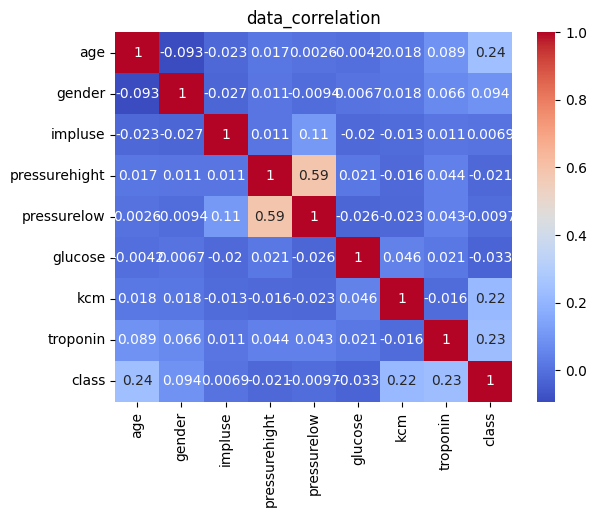

In [8]:
sns.heatmap(tb.corr(),annot=True,cmap='coolwarm')
plt.title('data_correlation')

Text(0.5, 0.98, 'distributions')

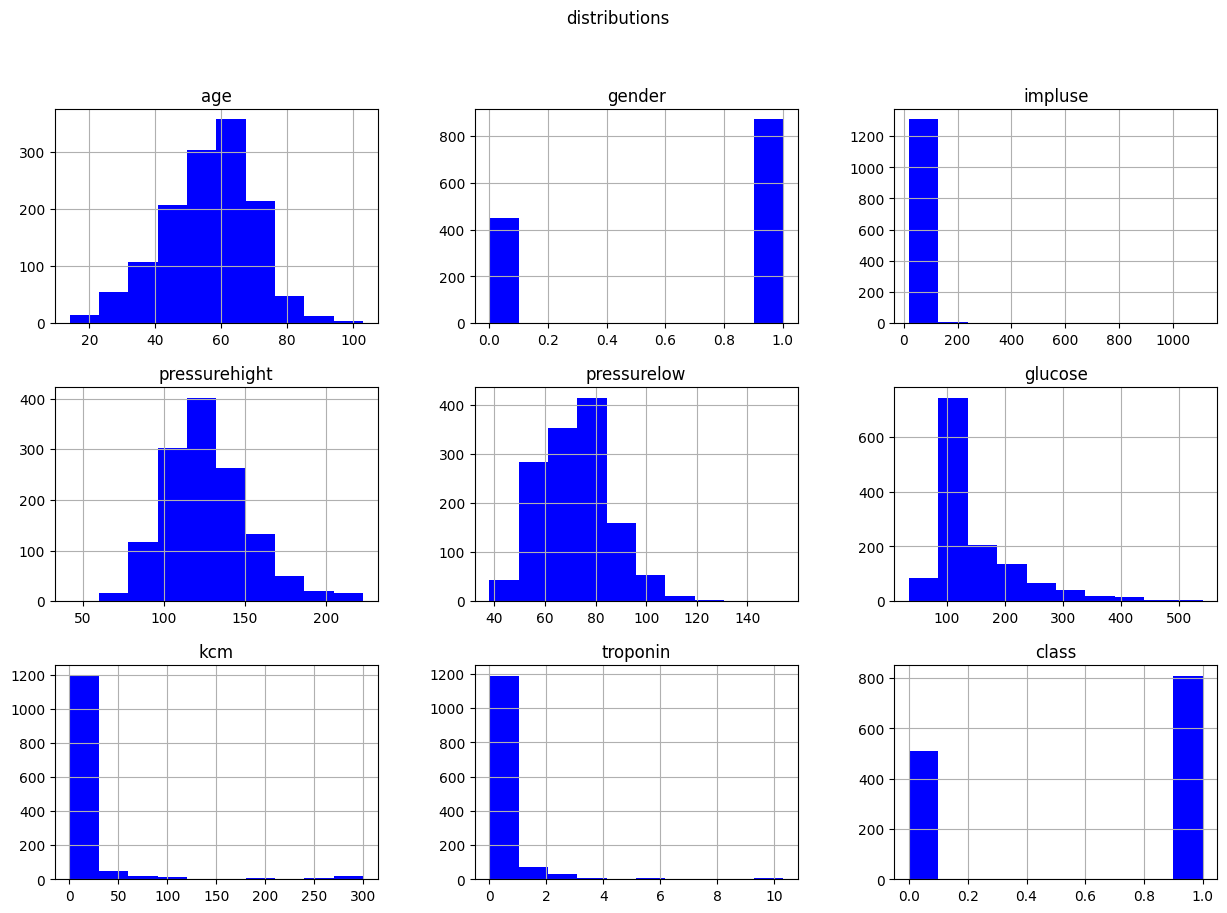

In [9]:
tb.hist(bins=10,figsize=(15,10),color='blue')
plt.suptitle('distributions')

Text(0.5, 1.0, 'compare the age of patients in two classes')

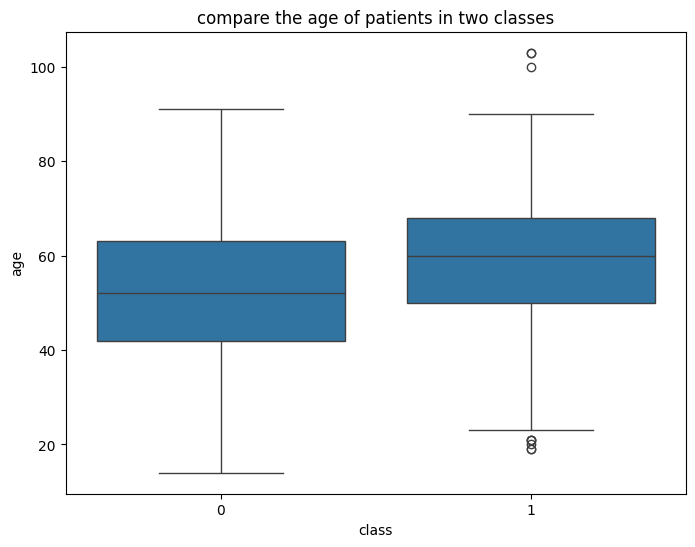

In [10]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=tb, x='class', y='age')
plt.title('compare the age of patients in two classes')

Text(0.5, 1.0, 'Average high blood pressure in different classes')

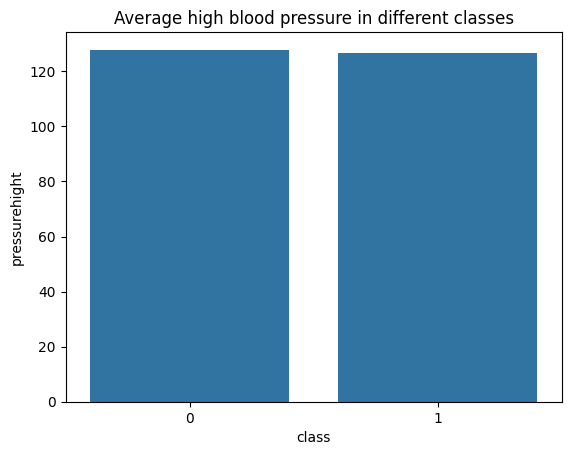

In [11]:
sns.barplot(data=tb, x='class', y='pressurehight', errorbar=None)
plt.title('Average high blood pressure in different classes')

Text(0, 0.5, 'count')

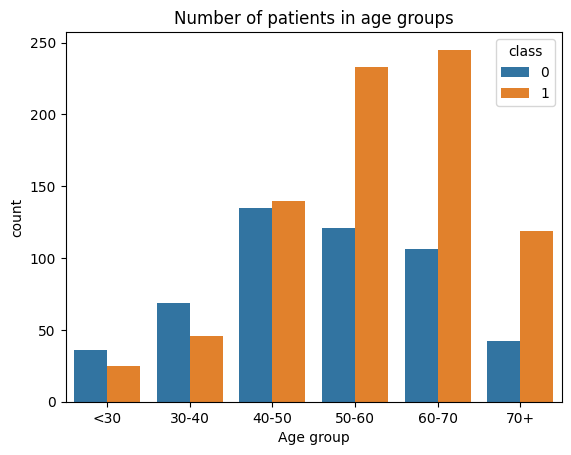

In [25]:
tb['age_group'] = pd.cut(tb['age'], bins=[0,30,40,50,60,70,100], labels=['<30','30-40','40-50','50-60','60-70','70+'])
sns.countplot(x='age_group', hue='class', data=tb)
plt.title('Number of patients in age groups')
plt.xlabel('Age group')
plt.ylabel('count')

Text(0, 0.5, '')

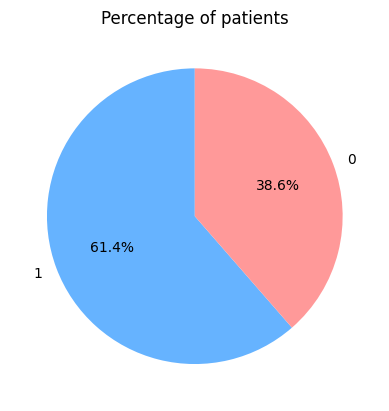

In [26]:
tb['class'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title('Percentage of patients')
plt.ylabel('')

# split data

In [30]:
tb=pd.read_csv('Heart Attack.csv')

X=tb.drop(columns='class')
y=tb['class']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)



In [31]:
x_train

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
598,42,1,83,153,91,98.0,5.460,0.003
1213,76,1,134,111,69,92.0,2.370,0.031
209,60,1,68,42,64,106.0,0.879,0.426
538,52,0,89,130,80,181.0,1.950,0.020
140,45,0,79,87,47,82.0,2.380,0.003
...,...,...,...,...,...,...,...,...
1095,50,0,85,119,76,130.0,16.100,0.009
1130,57,1,78,101,54,115.0,0.826,0.014
1294,50,0,79,92,55,415.0,16.950,0.005
860,54,1,72,154,84,127.0,2.970,0.007


## logistic regression

In [32]:

model=LogisticRegression(max_iter=1000,random_state=42)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
acc=accuracy_score(y_test,y_pred)
acc

0.7954545454545454

## conclusion

### In this project, data related to suspected diseases is examined and analyzed
The most important findings include the following:
troponin and kcm are the most impotrant factors in heart attack in comparison to other factors


C:\Users\Admin\AppData\Local\Temp\ipykernel_472\2373659986.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


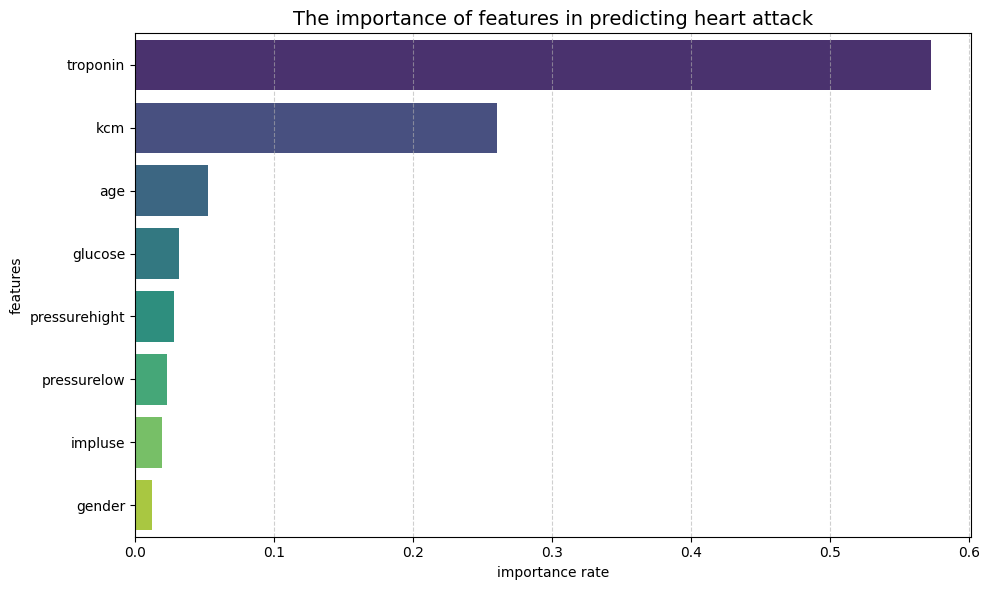

In [ ]:

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)


importances = model.feature_importances_        
features = X.columns                            
sorted_indices = np.argsort(importances)[::-1]  


plt.figure(figsize=(10, 6))
sns.barplot(
    x=importances[sorted_indices],
    y=features[sorted_indices],
    palette='viridis'
)
plt.title('The importance of features in predicting heart attack', fontsize=14)
plt.xlabel('importance rate')
plt.ylabel('features')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()